#### 46．引数（parameter）

In [6]:
def func(first, second, third):
    print(f"fitrst: {first}, second: {second}, third: {third}")

In [7]:
func(1, 2, 3)

fitrst: 1, second: 2, third: 3


In [10]:
def func(first, second, third):
    print(f"fitrst: {first}, second: {second}, third: {third}")

In [11]:
func(1, third=4, second=6)

fitrst: 1, second: 6, third: 4


In [12]:
# thirdにデフォ値をセットするケース
def func(first, second, third=9):
    print(f"fitrst: {first}, second: {second}, third: {third}")

In [14]:
func(1, 2)

fitrst: 1, second: 2, third: 9


In [15]:
func(1, 2, 99)

fitrst: 1, second: 2, third: 99


In [17]:
# キーワード引数が途中にあると、エラーになる
def func(first, second=22, 33):
    print(f"fitrst: {first}, second: {second}, third: {third}")

SyntaxError: invalid syntax (<ipython-input-17-d25806b17e9d>, line 2)

In [19]:
# これならOK
def func(first, third, second=22):
    print(f"fitrst: {first}, second: {second}, third: {third}")

In [21]:
func(1, third=4, second=6)

fitrst: 1, second: 6, third: 4


*2021/7/15

#### 47.「＊args」 「＊＊kwargs」

#### (1)「＊args」

In [28]:
def get_average(*args):
    print(args)

In [29]:
get_average(1, 2, 3, 4, 5)

(1, 2, 3, 4, 5)


#### ↑「＊args」によって、ひとつのタプルとして扱われる

In [8]:
def get_average(*args):
    num = len(args)
    if num == 0:
        return 0
    total = sum(args)
    return total / num

In [9]:
get_average(1, 2, 3, 4, 5)

3.0

In [14]:
get_average(2, 3)

2.5

#### (2)「＊＊kwargs」

#### ↑こちらは、辞書として扱われる（「＊args」の辞書版）

In [15]:
def kwargs_func(**kwargs):
    print(kwargs)

In [18]:
kwargs_func(param1=10, param2=6, paramx = 99)

{'param1': 10, 'param2': 6, 'paramx': 99}


↑このように、＜key=value＞で渡すと、辞書として扱われる

デフォルト引数の指定もできる

In [19]:
def kwargs_func(**kwargs):
    param1 = kwargs.get("param1", 111)
    param2 = kwargs.get("param2", 222)
    param3 = kwargs.get("param3", 333)
    print(f"param1:{param1}, param2:{param2}, param3:{param3}")

In [22]:
kwargs_func(param1=10, param2=6, param3 = 99)

param1:10, param2:6, param3:99


In [23]:
kwargs_func(param1=10, param2=6, param3 = 99, param4 = 44)

param1:10, param2:6, param3:99


#### ↓「＊」「＊＊」ってなんなのか？の説明

↑アンパッキングオペレータ（unpacking operator）

↑「＊」をつけると、アンパックして関数へ渡す。ってこと。

「＊」の例↓

In [24]:
nums = (1, 2, 3)
print(nums)

(1, 2, 3)


In [25]:
nums = (1, 2, 3)
print(*nums)

1 2 3


In [27]:
print(1, 2, 3)

1 2 3


「＊＊」の例↓

In [31]:
a = {"a":1, "b":2}
b = {"c":3, "d":4}
c = {**a, **b}
c

{'a': 1, 'b': 2, 'c': 3, 'd': 4}

↑　aとbの中身がアンパッキング（ほどかれて）されて、cに格納された、というかたち。

## 48.参照渡しと値渡し

In [38]:
def add_nums(a, b):
    return a + b

In [40]:
one = 1
two = 2
print(add_nums(one, two))

3


#### Pythonの標準では、すべて参照渡し。その確認↓

In [41]:
def add_nums(a, b):
    print(f"第一引数aのID：{id(a)}")
    print(f"第二引数aのID：{id(b)}")
    return a + b

In [43]:
one = 1
two = 2
print(f"oneのID：{id(one)}")
print(f"twoのID：{id(two)}")
print(add_nums(one, two))

oneのID：140734965167904
twoのID：140734965167936
第一引数aのID：140734965167904
第二引数aのID：140734965167936
3


#### ＊＊mutable と immutable とで、挙動が違う（らしい）↓

#### ＊まずはimmutableな例↓

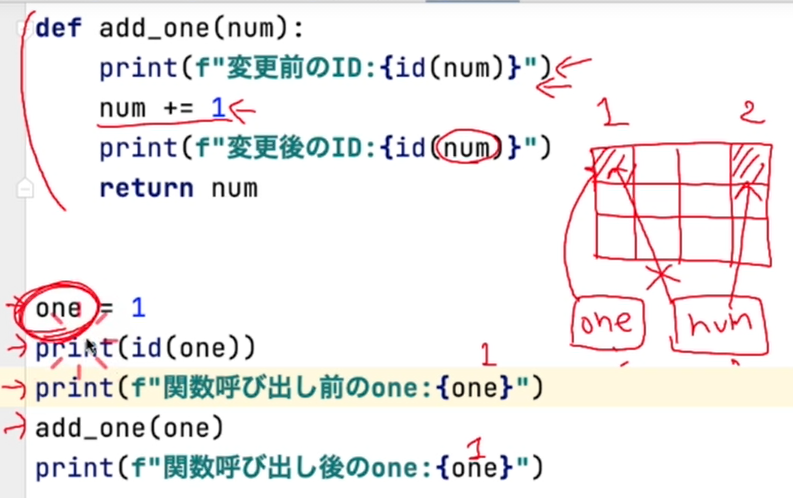

In [50]:
def add_num(num):
    print(f"関数内の変更前numのID:{id(num)}")
    num += 1
    print(f"関数内の変更後numのID:{id(num)}")

In [51]:
one = 1
print(id(one))

140734965167904


In [52]:
print(f"関数呼び出し前のone:{one}")

関数呼び出し前のone:1


↑この時点では、参照渡しされてるので、同じID

In [54]:
add_num(one)

関数内の変更前numのID:140734965167904
関数内の変更後numのID:140734965167936


↑「変更前」のほうは、関数呼び出し前のoneと同じID・・参照渡しされてるから。

　「変更後」のほうは、IDが変わっている・・intはimmutableなので、新しいnumがつくられるから。

In [53]:
print(f"関数呼び出し後のone:{one}")

関数呼び出し後のone:1


↑ 関数へoneを渡して、関数内で+1されたとしても、もともとのoneの値は変わらない


#### ＊続いて、mutableな例　↓　　・・リストで。

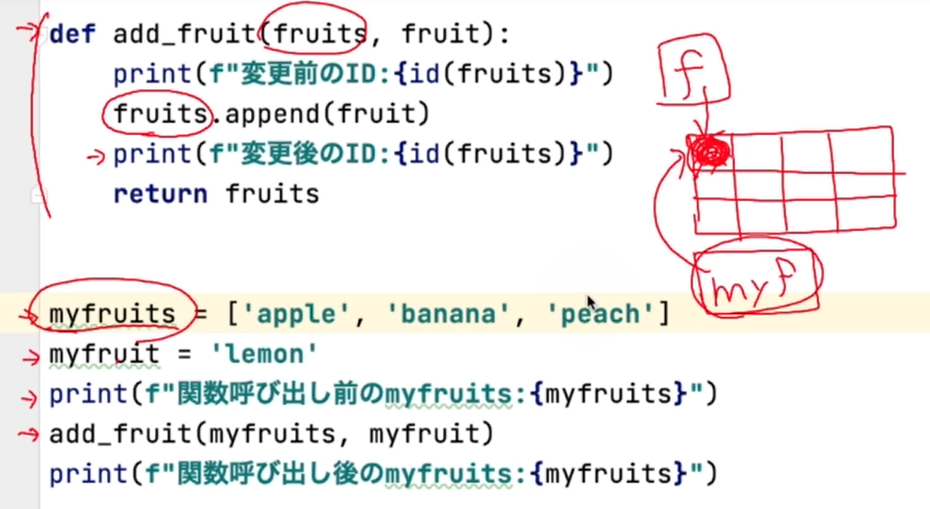

In [56]:
def add_fruit(fruits, fruit):
    print(f"変更前のID：{id(fruits)}")
    fruits.append(fruit)
    print(f"変更後のID：{id(fruits)}")

In [57]:
fruits = ["apple", "peach", "banana"]

In [58]:
add_fruit(fruits, "banana")

変更前のID：1454159786752
変更後のID：1454159786752


In [59]:
fruits

['apple', 'peach', 'banana', 'banana']

## 49．Type　annotation（Type hint）

### ＊関数の「引数」および「返り値」の型を指定することができる

In [60]:
def add_nums(num1: int, num2: int) -> int:
    return num1 + num2

In [61]:
print(add_nums(1, 2))

3


In [62]:
print(add_nums("1", "2"))

12


＊ただし。これを付けるケースはほとんどない（らしい）

＊Pythonは動的型付け言語なので、Type annotationをつけるのは思想と外れる

## 50．変数のスコープ（scope）

関数の中で定義された変数は、関数の中でしか使えない＝ローカル変数

In [20]:
age = 30

In [21]:
def print_age():
    age = 20  # ローカル変数
    print(f"I'm {age} years old")

In [22]:
print_age()

I'm 20 years old


In [24]:
print(age)

30


関数の中では、グローバル変数を上書きすることはできない（やり方はある（らしい）→次レクチャ）

関数の中では、まずローカル変数を参照しにいって、無ければ、グローバル変数を参照しにいく、という順序

なるべく、グローバル変数は使わずに、ローカル変数を使うようにしたほうがいい（バグのもとになるから（らしい））

## 51．グローバル変数

#### 関数の中でグローバル変数の値を上書きしたい場合・・関数の中で、「global変数ですよ、という宣言をする」

In [20]:
age = 30

In [25]:
def print_age():
    global age
    age = 20
    print(f"I'm {age} years old")

In [26]:
print_age()

I'm 20 years old


In [27]:
print(age)

20


↑ 関数によって、グローバル変数が上書きされている（ことがわかる）

関数を使ったときにグローバル変数を上書きするかどうかなんて、開発者からしたらぱっと分かりづらく、下手するとバグにつながる恐れもある。

↑ それを防止するために、Python的お作法として・・、

↓　書き換えられたくない場合は全て大文字で定義するのが一般的(constant variable)

In [41]:
CALL_COUNT = 0

In [38]:
def print_count1():
    # globalをつけると，global変数にアクセスすることができる
    global CALL_COUNT
    CALL_COUNT += 1
    print(f"関数1:{CALL_COUNT}回目")

def print_count2():
    global CALL_COUNT
    CALL_COUNT += 1
    print(f"関数2:{CALL_COUNT}回目")

In [42]:
print_count1()
print_count2()
print_count1()
print_count1()
# global scopeのcall_countが書き換えられている
print(CALL_COUNT)

関数1:1回目
関数2:2回目
関数1:3回目
関数1:4回目
4


In [43]:
print_count1()
print_count2()
print_count1()
print_count1()
# global scopeのcall_countが書き換えられている
print(CALL_COUNT)

関数1:5回目
関数2:6回目
関数1:7回目
関数1:8回目
8


## 52．関数のネスト